# Convolutional Neural Networks in Python with Keras


This is adapted from https://www.datacamp.com/community/tutorials/convolutional-neural-networks-python

Notable changes:
 * switched to MNIST numbers dataset
 * only training two epochs
 * when the doc talks about "dense" layers, it means the fully connected layers we created in the class

### Convolutional Neural Network: Introduction

A specific kind of a deep neural network is the convolutional network, which is commonly referred to as CNN or ConvNet. It's a deep, feed-forward artificial neural network. Remember that feed-forward neural networks are also called multi-layer perceptrons(MLPs), which are the quintessential deep learning models. The models are called "feed-forward" because information fl�ows right through the model. There are no feedback connections in which outputs of the model are fed back into itself.

CNNs specifically are inspired by the biological visual cortex. The cortex has small regions of cells that are sensitive to the specific areas of the visual field. This idea was expanded by a captivating experiment done by Hubel and Wiesel in 1962 (if you want to know more, here's a video). In this experiment, the researchers showed that some individual neurons in the brain activated or fired only in the presence of edges of a particular orientation like vertical or horizontal edges. For example, some neurons fired when exposed to vertical sides and some when shown a horizontal edge. Hubel and Wiesel found that all of these neurons were well ordered in a columnar fashion and that together they were able to produce visual perception. This idea of specialized components inside of a system having specific tasks is one that machines use as well and one that you can also find back in CNNs.

Convolutional neural networks have been one of the most influential innovations in the field of computer vision. They have performed a lot better than traditional computer vision and have produced state-of-the-art results. These neural networks have proven to be successful in many different real-life case studies and applications, like:

 * Image classification, object detection, segmentation, face recognition;
 * Self driving cars that leverage CNN based vision systems;
 * Classification of crystal structure using a convolutional neural network;

And many more, of course!
To understand this success, you'll have to go back to 2012, the year in which Alex Krizhevsky used convolutional neural networks to win that year's ImageNet Competition, reducing the classification error from 26% to 15%.

Note that ImageNet Large Scale Visual Recognition Challenge (ILSVRC) began in the year 2010 is an annual competition where research teams assess their algorithms on the given data set and compete to achieve higher accuracy on several visual recognition tasks.

This was the time when neural networks regained prominence after quite some time. This is often called the "third wave of neural networks". The other two waves were in the 1940s until the 1960s and in the 1970s to 1980s.

Alright, you know that you'll be working with feed-forward networks that are inspired by the biological visual cortex, but what does that actually mean?

Take a look at the picture below:

![Figure: Convolutional Neural Network from Wikimedia](https://upload.wikimedia.org/wikipedia/commons/6/63/Typical_cnn.png)

The image shows you that you feed an image as an input to the network, which goes through multiple convolutions, subsampling, a fully connected layer and finally outputs something.

But what are all these concepts?

 - The convolution layer computes the output of neurons that are connected to local regions or receptive fields in the input, each computing a dot product between their weights and a small receptive field to which they are connected to in the input volume. Each computation leads to extraction of a feature map from the input image. In other words, imagine you have an image represented as a 5x5 matrix of values, and you take a 3x3 matrix and slide that 3x3 window or kernel around the image. At each position of that matrix, you multiply the values of your 3x3 window by the values in the image that are currently being covered by the window. As a result, you'll get a single number that represents all the values in that window of the images. You use this layer to filtering: as the window moves over the image, you check for patterns in that section of the image. This works because of filters, which are multiplied by the values outputted by the convolution.
 - The objective of subsampling is to get an input representation by reducing its dimensions, which helps in reducing overfitting. One of the techniques of subsampling is max pooling. With this technique, you select the highest pixel value from a region depending on its size. In other words, max pooling takes the largest value from the window of the image currently covered by the kernel. For example, you can have a max-pooling layer of size 2 x 2 will select the maximum pixel intensity value from 2 x 2 region. You're right to think that the pooling layer then works a lot like the convolution layer! You also take a kernel or a window and move it over the image; The only difference is the function that is applied to the kernel and the image window isn't linear.

![Figure: Max-Pooling from Wikipedia](https://upload.wikimedia.org/wikipedia/commons/e/e9/Max_pooling.png)

 - The objective of the fully connected layer is to flatten the high-level features that are learned by convolutional layers and combining all the features. It passes the flattened output to the output layer where you use a softmax classifier or a sigmoid to predict the input class label.

In [14]:
!pip install tensorflow==2.2.0
!pip install keras
!pip install matplotlib
!pip install sklearn

     |████████████████████████████████| 22.3 MB 7.0 MB/s eta 0:00:01


     |████████████████████████████████| 303 kB 57.0 MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=76223e057f8fc13f5977e3c160fb430b0ccd32e6c2e134f511c96543620c702a
  Stored in directory: /home/jovyan/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


## Load the Data

Keras comes with a library called datasets, which you can use to load datasets out of the box: you download the data from the server and speeds up the process since you no longer have to download the data to your computer. The train and test images along with the labels are loaded and stored in variables train_X, train_Y, test_X, test_Y, respectively.

In [2]:
from keras.datasets import mnist
(train_X,train_Y), (test_X,test_Y) = mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


Great! That was pretty simple, wasn't it?

You have probably done this a million times by now, but it's always an essential step to get started. Now you're completely set to start analyzing, processing and modeling your data!


## Analyze the Data
Let's now analyze how images in the dataset look like. Even though you know the dimension of the images by now, it's still worth the effort to analyze it programmatically: you might have to rescale the image pixels and resize the images.

In [8]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


From the above output, you can see that the training data has a shape of 60000 x 28 x 28 since there are 60,000 training samples each of 28 x 28 dimension. Similarly, the test data has a shape of 10000 x 28 x 28 since there are 10,000 testing samples.

In [6]:
# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


There's also a total of ten output classes that range from 0 to 9.

Also, don't forget to take a look at what the images in your dataset:

Text(0.5, 1.0, 'Ground Truth : 7')

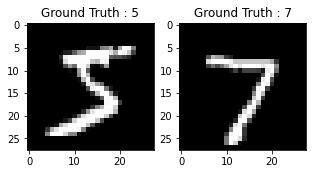

In [9]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

The output of above two plots looks like 5 and a 7.


## Data Preprocessing
As you could see in the above plot, the images are grayscale images have pixel values that range from 0 to 255. Also, these images have a dimension of 28 x 28. As a result, you'll need to preprocess the data before you feed it into the model.

As a first step, convert each 28 x 28 image of the train and test set into a matrix of size 28 x 28 x 1 which is fed into the network.

In [10]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

The data right now is in an int8 format, so before you feed it into the network you need to convert its type to float32, and you also have to rescale the pixel values in range 0 - 1 inclusive. So let's do that!

In [11]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

Now you need to convert the class labels into a one-hot encoding vector.
In one-hot encoding, you convert the categorical data into a vector of numbers. The reason why you convert the categorical data in one hot encoding is that machine learning algorithms cannot work with categorical data directly. You generate one boolean column for each category or class. Only one of these columns could take on the value 1 for each sample. Hence, the term one-hot encoding.

For your problem statement, the one hot encoding will be a row vector, and for each image, it will have a dimension of 1 x 10. The important thing to note here is that the vector consists of all zeros except for the class that it represents, and for that, it is 1. For example, the ankle boot image that you plotted above has a label of 9, so for all the ankle boot images, the one hot encoding vector would be [0 0 0 0 0 0 0 0 1 0].

So let's convert the training and testing labels into one-hot encoding vectors:

In [12]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 5
After conversion to one-hot: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


That's pretty clear, right? Note that you can also print the train_Y_one_hot, which will display a matrix of size 60000 x 10 in which each row depicts one-hot encoding of an image.

This last step is a crucial one. In machine learning or any data specific task, you should partition the data correctly. For the model to generalize well, you split the training data into two parts, one designed for training and another one for validation. In this case, you will train the model on 80\% of the training data and validate it on 20\% of the remaining training data. This will also help to reduce overfitting since you will be validating the model on the data it would not have seen in training phase, which will help in boosting the test performance.

In [15]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

For one last time let's check the shape of training and validation set.

In [16]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

## The Network
The images are of size 28 x 28. You convert the image matrix to an array, rescale it between 0 and 1, reshape it so that it's of size 28 x 28 x 1, and feed this as an input to the network.

You'll use three convolutional layers:

The first layer will have 32-3 x 3 filters,
The second layer will have 64-3 x 3 filters and
The third layer will have 128-3 x 3 filters.
In addition, there are three max-pooling layers each of size 2 x 2.

### Model the Data
First, let's import all the necessary modules required to train the model.

In [17]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

You will use a batch size of 64 using a higher batch size of 128 or 256 is also preferable it all depends on the memory. It contributes massively to determining the learning parameters and affects the prediction accuracy. You will train the network for 10 epochs (changed by hof@ - original training is 20)

In [31]:
batch_size = 128
epochs = 5
num_classes = 10

## Neural Network Architecture
In Keras, you can just stack up layers by adding the desired layer one by one. That's exactly what you'll do here: you'll first add a first convolutional layer with Conv2D(). Note that you use this function because you're working with images! Next, you add the Leaky ReLU activation function which helps the network learn non-linear decision boundaries. Since you have ten different classes, you'll need a non-linear decision boundary that could separate these ten classes which are not linearly separable.

More specifically, you add Leaky ReLUs because they attempt to fix the problem of dying Rectified Linear Units (ReLUs). The ReLU activation function is used a lot in neural network architectures and more specifically in convolutional networks, where it has proven to be more effective than the widely used logistic sigmoid function. As of 2017, this activation function is the most popular one for deep neural networks. The ReLU function allows the activation to be thresholded at zero. However, during the training, ReLU units can "die". This can happen when a large gradient flows through a ReLU neuron: it can cause the weights to update in such a way that the neuron will never activate on any data point again. If this happens, then the gradient flowing through the unit will forever be zero from that point on. Leaky ReLUs attempt to solve this: the function will not be zero but will instead have a small negative slope.

Next, you'll add the max-pooling layer with MaxPooling2D() and so on. The last layer is a Dense layer that has a softmax activation function with 10 units, which is needed for this multi-class classification problem.

In [19]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(Dense(num_classes, activation='softmax'))

## Compile the Model
After the model is created, you compile it using the Adam optimizer, one of the most popular optimization algorithms. You can read more about this optimizer here. Additionally, you specify the loss type which is categorical cross entropy which is used for multi-class classification, you can also use binary cross-entropy as the loss function. Lastly, you specify the metrics as accuracy which you want to analyze while the model is training.

In [28]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

Let's visualize the layers that you created in the above step by using the summary function. This will show some parameters (weights and biases) in each layer and also the total parameters in your model.

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         7

## Train the Model
It's finally time to train the model with Keras' fit() function! The model trains for 20 epochs. The fit() function will return a history object; By storying the result of this function in fashion_train, you can use it later to plot the accuracy and loss function plots between training and validation which will help you to analyze your model's performance visually.

In [32]:
train = model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/5
375/375 [==============================] - 223s 593ms/step - loss: 0.0240 - accuracy: 0.9925 - val_loss: 0.0300 - val_accuracy: 0.9907
Epoch 2/5
375/375 [==============================] - 213s 569ms/step - loss: 0.0146 - accuracy: 0.9954 - val_loss: 0.0331 - val_accuracy: 0.9898
Epoch 3/5
375/375 [==============================] - 218s 582ms/step - loss: 0.0114 - accuracy: 0.9962 - val_loss: 0.0335 - val_accuracy: 0.9909
Epoch 4/5
375/375 [==============================] - 219s 583ms/step - loss: 0.0103 - accuracy: 0.9970 - val_loss: 0.0401 - val_accuracy: 0.9890
Epoch 5/5
375/375 [==============================] - 204s 543ms/step - loss: 0.0099 - accuracy: 0.9966 - val_loss: 0.0392 - val_accuracy: 0.9887


Finally! You trained the model on fashion-MNIST for 20 epochs, and by observing the training accuracy and loss, you can say that the model did a good job since after 20 epochs the training accuracy is 99% and the training loss is quite low.

However, it looks like the model is overfitting, as the validation loss is 0.4396 and the validation accuracy is 92%. Overfitting gives an intuition that the network has memorized the training data very well but is not guaranteed to work on unseen data, and that is why there is a difference in the training and validation accuracy.

You probably need to handle this. In next sections, you'll learn how you can make your model perform much better by adding a Dropout layer into the network and keeping all the other layers unchanged.

But first, let's evaluate the performance of your model on the test set before you come on to a conclusion.

## Model Evaluation on the Test Set

In [33]:
test_eval = model.evaluate(test_X, test_Y_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.03134835138916969
Test accuracy: 0.9902999997138977


The test accuracy looks impressive. It turns out that your classifier does better than the benchmark that was reported here, which is an SVM classifier with mean accuracy of 0.897. Also, the model does well compared to some of the deep learning models mentioned on the GitHub profile of the creators of fashion-MNIST dataset.

However, you saw that the model looked like it was overfitting. Are these results really all that good?

Let's put your model evaluation into perspective and plot the accuracy and loss plots between training and validation data:

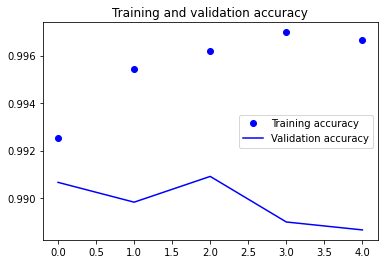

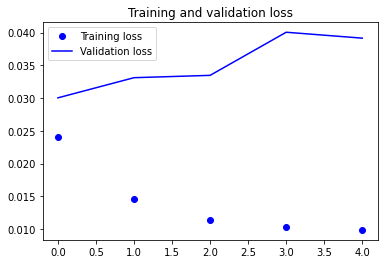

In [34]:
accuracy = train.history['accuracy']
val_accuracy = train.history['val_accuracy']
loss = train.history['loss']
val_loss = train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()